In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [4]:
#train_data = pd.read_csv("Train_Data.csv")
train_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

# Data preprocessing of Train data

In [6]:
# filling missing values of the feature previous_conditons with their mode


train_data['A'] = train_data['A'].fillna(train_data['A'].mode()[0])
train_data['B'] = train_data['B'].fillna(train_data['B'].mode()[0])
train_data['C'] = train_data['C'].fillna(train_data['C'].mode()[0])
train_data['D'] = train_data['D'].fillna(train_data['D'].mode()[0])
train_data['E'] = train_data['E'].fillna(train_data['E'].mode()[0])
train_data['F'] = train_data['F'].fillna(train_data['F'].mode()[0])
train_data['Z'] = train_data['Z'].fillna(train_data['Z'].mode()[0])

In [7]:
# checking if there are still missing values in theses columns respectively

print(f" sum of missing values for A : {train_data['A'].isnull().sum()}")
print(f" sum of missing values for B : {train_data['B'].isnull().sum()}")
print(f" sum of missing values for C : {train_data['C'].isnull().sum()}")
print(f" sum of missing values for D : {train_data['D'].isnull().sum()}")
print(f" sum of missing values for E : {train_data['E'].isnull().sum()}")
print(f" sum of missing values for F : {train_data['F'].isnull().sum()}")
print(f" sum of missing values for Z : {train_data['Z'].isnull().sum()}")

 sum of missing values for A : 0
 sum of missing values for B : 0
 sum of missing values for C : 0
 sum of missing values for D : 0
 sum of missing values for E : 0
 sum of missing values for F : 0
 sum of missing values for Z : 0


In [8]:
# summing up the updated features A,B,C,D,E,F,Z to get the total sum of previous conditions
# for the missing rows.

train_data['Number_of_prev_cond'] = train_data['A'] + train_data['B'] + train_data['C'] + train_data['D'] + train_data['E'] + train_data['F'] + train_data['Z']

In [9]:
# checking to confirm the total number of null value in the feature Number_of_prev_conditions

train_data['Number_of_prev_cond'].isnull().sum()

0

In [10]:
# checking if there is unique value in this column

train_data['ID_Patient_Care_Situation'].nunique()

# sinnce there are no unique values in this column then we ca exclude the column from our data set

23097

In [11]:
train_data = train_data.drop('ID_Patient_Care_Situation', axis=1)

In [12]:
train_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [13]:
train_data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

Converting categorical features to numeric since machine learning models
do not work with objects


In [14]:
new_training = pd.get_dummies(train_data, columns=['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban'])

In [15]:
new_training

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,D,E,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,3333,56,18.479385,Stable,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,5,5740,36,22.945566,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,23,10446,48,27.510027,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
3,51,12011,5,19.130976,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0,12513,128,1.348400,Stable,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,3,1548,14,18.643448,Stable,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,1,0
23093,41,2769,55,23.684585,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
23094,24,7671,63,27.500039,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
23095,11,5764,25,23.719125,Stable,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,1,0


In [16]:
# since the feature column Patient_mental_condition have a constant object value,
# we just remove because it does not add anything to our model

new_training = new_training.drop('Patient_mental_condition', axis =1)


In [17]:
# splitting the dataset into dependent and independent variables


x = new_training.drop('Survived_1_year', axis=1)
y= new_training['Survived_1_year']

Text(0.5, 0, 'survival')

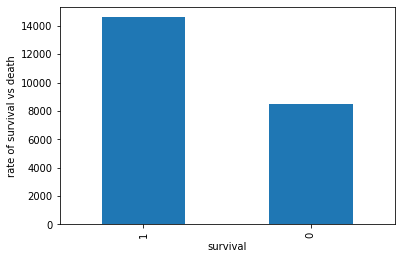

In [18]:
y.value_counts().plot(kind='bar')
plt.ylabel("rate of survival vs death")
plt.xlabel("survival")

In [19]:
# splitting the dataset into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Model Building

Logistic Regression, Random forest and XGboost classifier was used but XGBoost performed more better

In [21]:
# using XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score


xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)
pred_xgb = xg_model.predict(x_test)

print(f'f1 score = {f1_score(y_test, pred_xgb)}')
print(f'accuracy score = {accuracy_score(y_test, pred_xgb)}')

[11:12:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score = 0.8570464135021097
accuracy score = 0.8166666666666667


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 100]}
#rf = RandomForestClassifier(random_state = 42)
rf = XGBClassifier()

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "bootstrap" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:16:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [23]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}

In [24]:
pred = grid_search.predict(x_test)
f1_score(y_test, pred)

0.8636287203632083

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cn = confusion_matrix(y_test, pred)
pres = precision_score(y_test, pred)
re = recall_score(y_test, pred)
print(cn)
print(pres)
print(re)

[[1241  456]
 [ 355 2568]]
0.8492063492063492
0.8785494355114608


# Test Data


In [61]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [62]:
test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [64]:
test_data['Patient_Smoker'].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [65]:
test_data['Treated_with_drugs'].value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX3 DX4               41
DX1 DX2 DX5               41
DX1 DX2 DX3               40
DX2 DX3 DX4               40
DX3 DX4 DX5               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX1 DX2 DX4 DX5            8
DX2 DX3 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

In [66]:
test_data = pd.get_dummies(test_data, columns=['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban'])

In [67]:
# dropping the ID_Patient_Care_Situation column and also Patient_mental_condition column

test_data = test_data.drop(['ID_Patient_Care_Situation', 'Patient_mental_condition'], axis=1)

In [68]:
# creating a new column for Patient_Smoker_Cannot

new_col = test_data.loc[:,'Patient_Smoker_Cannot_say']=0

In [69]:
# inserting the created column in the test_data set
test_data.insert(loc=44, column='Patient_Smoker_Cannot say', value =new_col  )
test_data = test_data.drop('Patient_Smoker_Cannot_say', axis=1) # removing the duplicate of the column Patient_Smoker_Cannot_say

In [70]:
test_data

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1
2,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,1,0,1,0
3,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,0,1
4,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,9299,28,29.106314,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
9299,7,6273,4,20.616673,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
9300,16,11473,20,24.727357,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
9301,50,5681,33,17.517426,1.0,1.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,1


In [71]:
# predicting the test data

prediction = grid_search.predict(test_data)

In [75]:
# saving my predicted value in a csv file

result = pd.DataFrame({'prediction': prediction})
result.to_csv('submission.csv', index=False)